# Neural Network Q1 (Forest_Fires)

#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


# 1. import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from keras.models import Sequential
from keras.callbacks import History 
history = History()

# 2. Import Data

In [2]:
forest_fire = pd.read_csv('forestfires.csv')
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# 3. EDA

In [3]:
forest_fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
forest_fire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
forest_fire['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
forest_fire.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


### Checking Outlires

C:\Users\shubham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


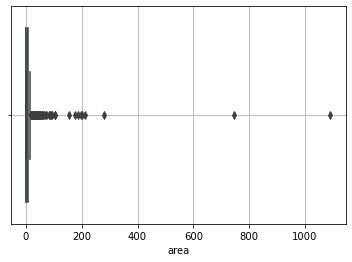

In [7]:
sns.boxplot(forest_fire['area'])
plt.grid()

#### There are 3 Outlier instances in our data

Skewness = 12.846933533934868
Kurtosis = 194.1407210942299


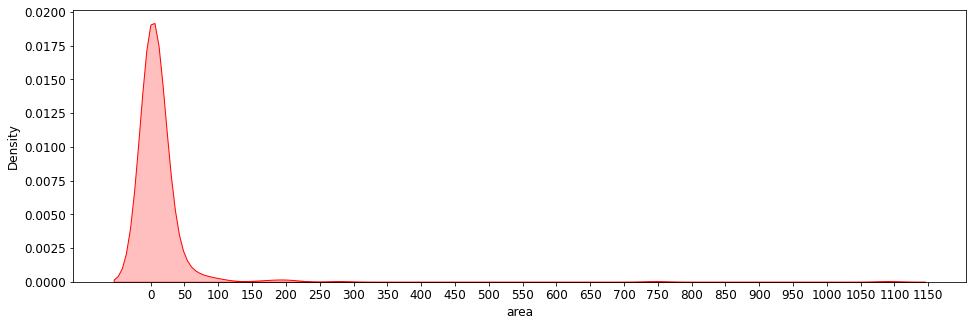

In [118]:
plt.figure(figsize=(16,5))
print("Skewness =",forest_fire['area'].skew())
print("Kurtosis =",forest_fire['area'].kurtosis())
sns.kdeplot(forest_fire['area'],shade=True,color='r')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### The Data is highly skewed and has large kurtosis value

#### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [119]:
dfa = forest_fire[forest_fire.columns[0:10]]
month_colum = dfa.select_dtypes(include='object')
month_colum

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


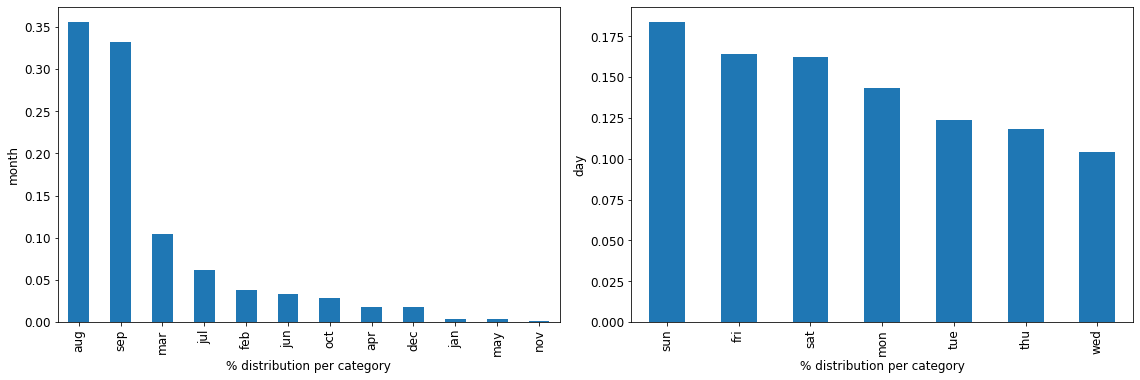

In [120]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    forest_fire[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

Text(0.5, 1.0, 'Different Time periode of fire')

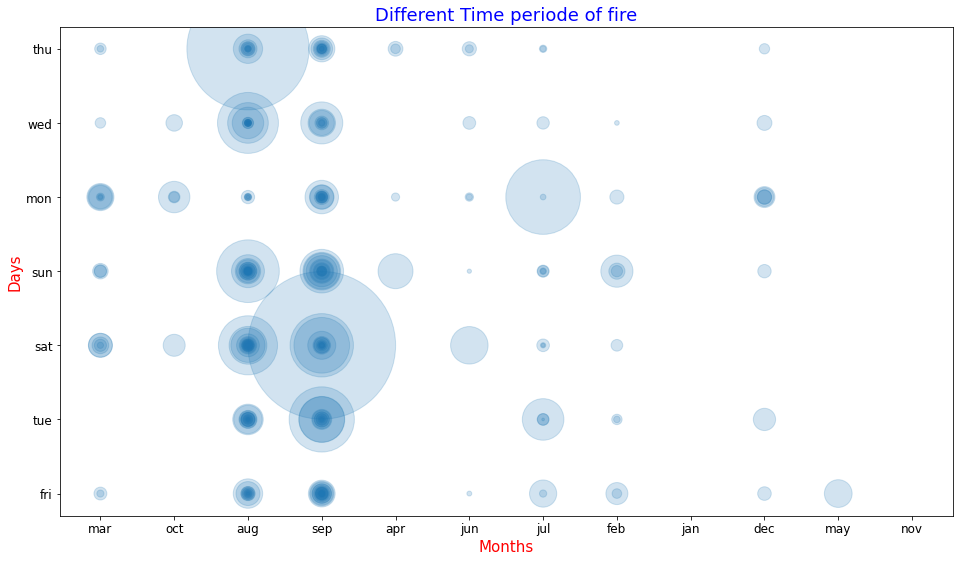

In [121]:
forest_fire.plot(kind='scatter', x='month', y='day', alpha=0.2, s=20*forest_fire['area'],figsize=(16,9))
plt.xlabel('Months',color='red',fontsize=15)
plt.ylabel('Days',color='red',fontsize=15)
plt.title('Different Time periode of fire',color='blue',fontsize=18)

#### Majority of the fire accors in the month Aug and Sep || sunday and friday have recorded the most cases of fire

In [122]:
num_columns = dfa.select_dtypes(exclude='object')

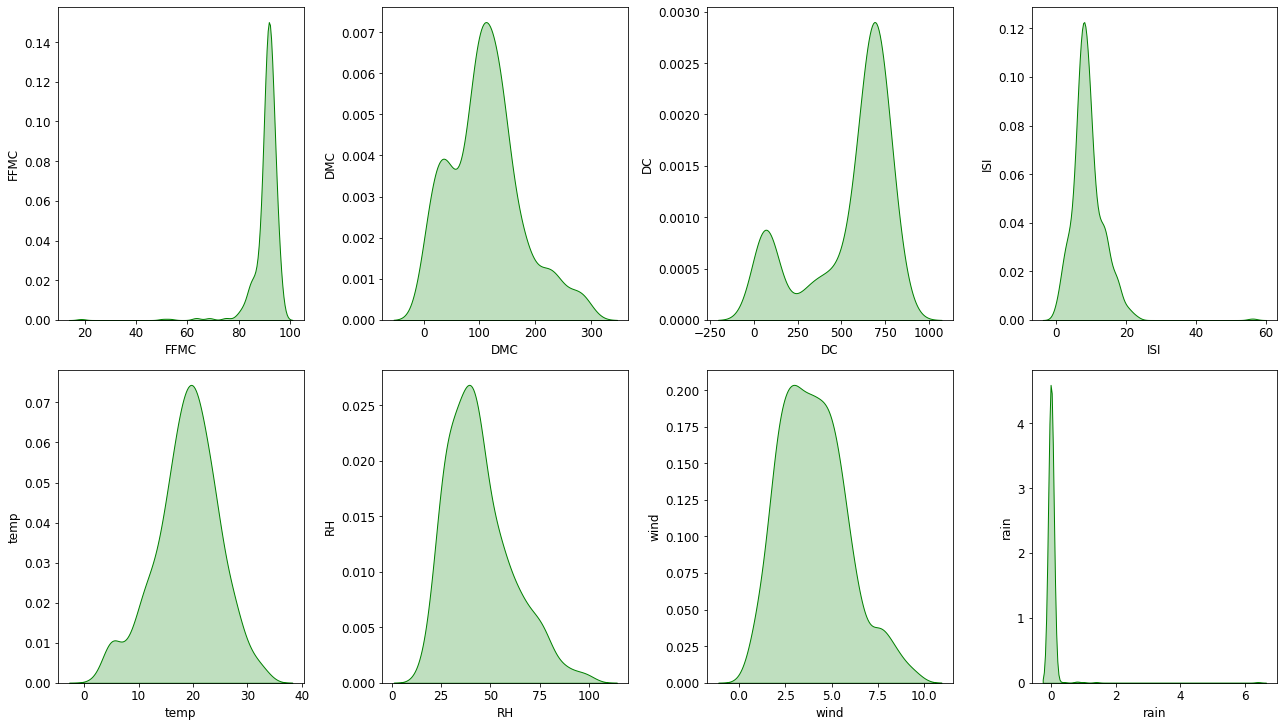

In [123]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest_fire[col],color='g',shade=True,legend=True)
    plt.ylabel(col)
plt.tight_layout() 
plt.show()    

In [124]:
pd.DataFrame(data=[num_columns.skew(),num_columns.kurtosis()],index=['skewness','kurtosis'])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


### Finding Correlation

In [125]:
corr = forest_fire[forest_fire.columns[0:11]].corr()

<AxesSubplot:>

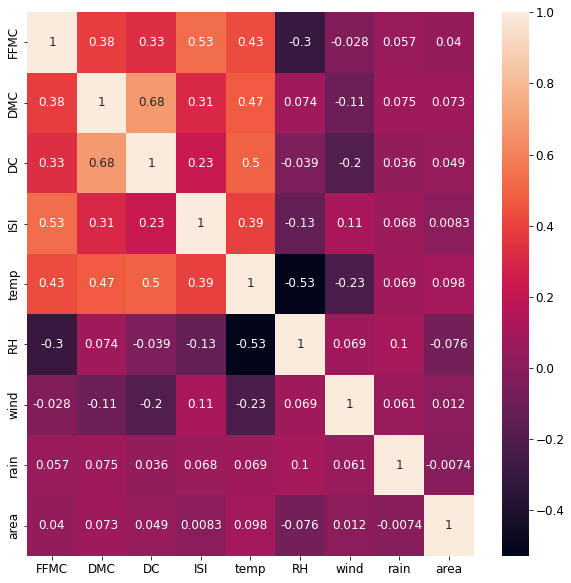

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 4. Model Building

In [127]:
mapping = {'small': 0, 'large': 1}


In [128]:
df1 = forest_fire.replace(mapping)
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df1.drop(["month","day"],axis=1,inplace = True)


In [130]:
X = np.array(df1.iloc[:,0:28])
y = np.array(df1.iloc[:,28])

In [131]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [132]:
X_norm = norm_func(X)

In [133]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

# 5. Create Neural Network Model

In [134]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [135]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit the model

In [146]:
model.fit(x_train, y_train, epochs=150,validation_split=0.33, batch_size=10,callbacks=[history])

Epoch 1/150
28/28 [==============================] - 0s 7ms/step - loss: 0.1501 - accuracy: 0.9493 - val_loss: 0.1472 - val_accuracy: 0.9270
Epoch 2/150
28/28 [==============================] - 0s 5ms/step - loss: 0.1504 - accuracy: 0.9457 - val_loss: 0.1410 - val_accuracy: 0.9489
Epoch 3/150
28/28 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9348 - val_loss: 0.1399 - val_accuracy: 0.9489
Epoch 4/150
28/28 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9529 - val_loss: 0.1402 - val_accuracy: 0.9343
Epoch 5/150
28/28 [==============================] - 0s 6ms/step - loss: 0.1437 - accuracy: 0.9348 - val_loss: 0.1367 - val_accuracy: 0.9489
Epoch 6/150
28/28 [==============================] - 0s 5ms/step - loss: 0.1389 - accuracy: 0.9493 - val_loss: 0.1358 - val_accuracy: 0.9489
Epoch 7/150
28/28 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9493 - val_loss: 0.1391 - val_accuracy: 0.9708
Epoch 8/150
2

Epoch 59/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9819 - val_loss: 0.0810 - val_accuracy: 0.9708
Epoch 60/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9855 - val_loss: 0.0795 - val_accuracy: 0.9708
Epoch 61/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9891 - val_loss: 0.0845 - val_accuracy: 0.9635
Epoch 62/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0782 - accuracy: 0.9746 - val_loss: 0.0780 - val_accuracy: 0.9708
Epoch 63/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0722 - accuracy: 0.9855 - val_loss: 0.0774 - val_accuracy: 0.9781
Epoch 64/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0723 - accuracy: 0.9855 - val_loss: 0.0776 - val_accuracy: 0.9781
Epoch 65/150
28/28 [==============================] - 0s 5ms/step - loss: 0.0770 - accuracy: 0.9746 - val_loss: 0.0775 - val_accuracy: 0.9781
Epoch 

####  evaluate the model

In [147]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9927
accuracy: 99.27%


In [148]:
model.history.history.keys()

dict_keys([])

In [149]:
hist= print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### summarize history for accuracy

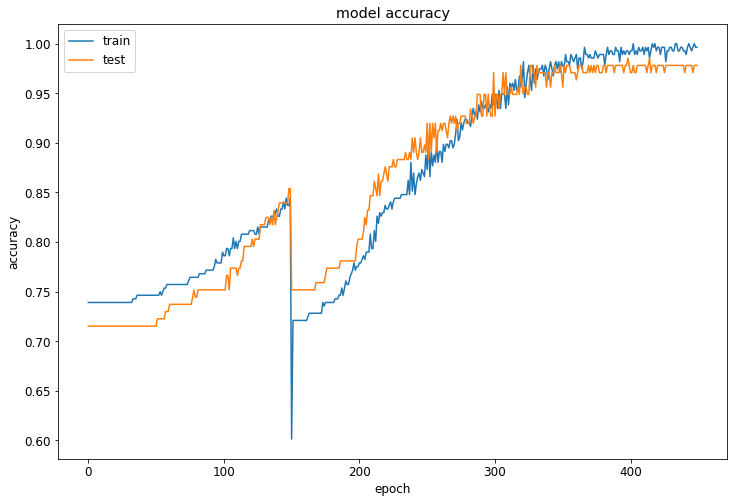

In [150]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 12
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### summarize history for loss

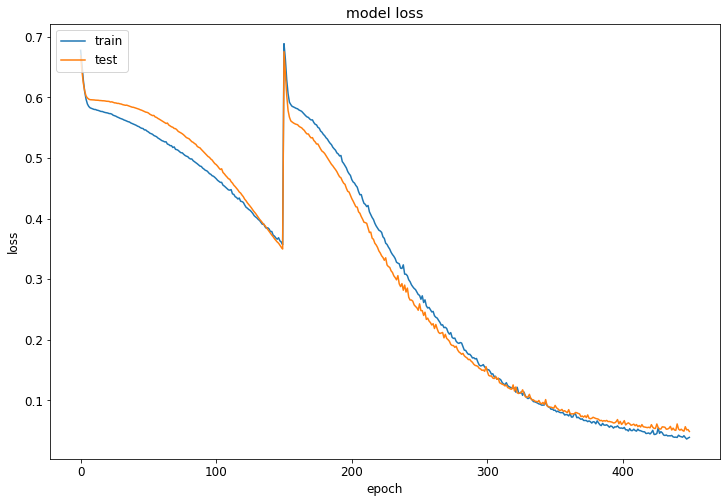

In [151]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Predicting values from Model using same dataset

In [152]:
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

#### generating predictions for test data & creating table with test price & predicted price for test

In [156]:
y_predict_test = model.predict(x_test) 


test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

4/4 [==============================] - 0s 2ms/step
(104, 3)


,Test_Actual,Test_Probability,Test_Predicted
0,1,0.899437,1
1,0,0.003865,0
2,1,0.981555,1
3,0,0.002311,0
4,0,0.609429,1
5,0,0.034691,0
6,0,0.004133,0
7,0,0.004449,0
8,0,0.001223,0
9,0,0.005232,0


#### generating predictions for train data & creating table with test price & predicted price for test

In [157]:
y_predict_train = model.predict(x_train)

train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

13/13 [==============================] - 0s 2ms/step
(413, 3)


,Train_Actual,Train_Probability,Train_Predicted
0,0,0.007990,0
1,1,0.999993,1
2,1,0.999912,1
3,1,0.999675,1
4,0,0.005066,0
5,0,0.001392,0
6,1,1.000000,1
7,0,0.178846,0
8,0,0.147317,0
9,1,1.000000,1


### Predicting the probabilities of Forest Burned Area

# END